In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
%matplotlib inline
import sklearn

### Current samples times above the threshold

In [8]:
ds1 = pd.read_csv('data/AllSites.csv')
threshold = np.where(ds1['NP_Cya_bio'] >= 4e8)
target = np.zeros(len(ds1['NP_Cya_bio']))
target[threshold] = 1
ds1['target'] = pd.Series(target)
ds1 = ds1.dropna(axis=0, how='any')

In [9]:
t = np.where(ds1['target'] == 1.0)
ds1.iloc[t]
# ds1

,StationID,Station,Date,Time,Stratum,Depth,TP,DP,Cl,TN,TempC,Chla,Secchi,NP_Cya_bio,target
936,9,Otter Creek Segment,8/18/11,1235.0,E,4.6,15.7,9.3,12.6,H0.35,22.1,10.4,2.3,4.260000e+08,1.0
3037,40,St. Albans Bay,8/6/14,1210.0,U,2.2,37,12.1,10.6,0.74,24.7,28.2,1.1,7.110000e+08,1.0
3038,40,St. Albans Bay,8/19/14,1010.0,U,2.6,41.7,13.5,10.9,0.61,20.5,25.38,1.3,7.280000e+08,1.0
3269,50,Missisquoi Bay,9/22/06,1100.0,U,2.2,75.5,23.2,6.7,0.64,17.3,36,1.1,4.230000e+08,1.0
3271,50,Missisquoi Bay,10/6/06,1100.0,U,2.6,69.4,33.6,7.3,0.63,13.0,12.6,1.3,7.050000e+08,1.0
3307,50,Missisquoi Bay,8/20/08,1050.0,U,2,66.4,16.6,5.9,0.74,21.3,44.9,1,1.260000e+09,1.0
3400,50,Missisquoi Bay,7/30/13,1020.0,U,3,40.2,16,7.7,0.8,23.8,45.03,1.5,1.170000e+09,1.0
3461,51,Missisquoi Bay Central,9/7/06,1055.0,U,2.4,62.9,18,6.3,0.77,19.3,3.73,1.2,4.380000e+08,1.0
3464,51,Missisquoi Bay Central,9/22/06,1040.0,U,2,73.7,19.5,6.6,0.8,17.3,42.4,0.8,1.540000e+09,1.0
3499,51,Missisquoi Bay Central,8/6/08,1115.0,U,2,74.1,29.7,7.1,0.81,23.2,45.5,1.1,1.190000e+09,1.0


### Using regex capture groups to clean 'H's' out of data

In [15]:
print_data = False
show_positive_cases = False
ds2 = ds1.drop(['Station', 'Stratum','Date','StationID','Time'], axis=1)
# ds2
ds2['Depth'] = ds1['Depth'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['TP'] = ds1['TP'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Cl'] = ds1['Cl'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['DP'] = ds1['DP'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['TN'] = ds1['TN'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['TempC'] = ds1['TempC'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Chla'] = ds1['Chla'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Chla'] = ds1['Chla'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Secchi'] = ds1['Secchi'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['date'] = ds1['Date'].astype(str).str.extract('(\d)').astype(int) # This is just the month number
ds2 = ds2.drop(['NP_Cya_bio'], axis=1)
y = np.array(ds2['target'])
X = np.array(ds2.drop(['target'], axis=1))

if show_positive_cases:
    ds1.iloc[t]
if print_data:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(ds2)
print(ds2['date'])        

1       5
2       5
4       6
5       6
7       7
       ..
3629    8
3631    9
3632    9
3634    1
3636    1
Name: date, Length: 1298, dtype: int64


### Simple SVM Testing

In [ ]:
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

X_normalized = preprocessing.normalize(X) # normalize X for processing
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
print('C=5\n')
for kernel in kernels:
    svm_classifer = svm.SVC(C=5, kernel=kernel)
    y_predicted = cross_val_predict(svm_classifer, X, y, cv=20)
    print(f'KERNEL: {kernel}')
    print(metrics.classification_report(y, y_predicted))
    print(metrics.confusion_matrix(y, y_predicted))
    print('\n')
print('C=50\n')
for kernel in kernels:
    svm_classifer = svm.SVC(C=50, kernel=kernel)
    y_predicted = cross_val_predict(svm_classifer, X, y, cv=5)
    print(f'KERNEL: {kernel}')
    print(metrics.classification_report(y, y_predicted))
    print(metrics.confusion_matrix(y, y_predicted))
    print('\n')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
y_train_pos = np.where(y_train == 1)
y_test_pos= np.where(y_test == 1)
assert len(y_test_pos[0]) >= 5, "Need at least 5 posit\ive samples in training set"

loo = LeaveOneOut()
X_train_normalized = preprocessing.normalize(X_train) # normalize X for processing
svm_classifer = svm.SVC()
kernels = ['linear', 'rbf', 'sigmoid']
scorer = make_scorer(recall_score, zero_division=0)
final_params = []
for kernel in kernels:
    print(f'KERNEL: {kernel}')
    svm_classifer = svm.SVC(kernel=kernel)
    distros = dict(C=np.logspace(-2, 10, 10), gamma=np.logspace(-9, 3, 10))
    print('optimizing hyperparams...')
    search = RandomizedSearchCV(svm_classifer, distros, scoring=scorer, n_iter=50, verbose=10, cv=len(y_train_pos[0]), n_jobs=4)
    search = search.fit(X_train_normalized, y_train)
    final_params.append(search.best_params_)
    params = search.best_params_

for params in final_params:
    print(f'hyperparamters: {params}')
    print('testing optimized hyperparams...')
    X_test_normalized = preprocessing.normalize(X_test)
    svm_classifer = svm.SVC(**params)
    y_predicted = cross_val_predict(svm_classifer, X_test_normalized, y_test, cv=len(y_test_pos[0]), verbose=10, n_jobs=4, pre_dispatch='2*n_jobs')
    print(metrics.classification_report(y_test, y_predicted))
    print(metrics.confusion_matrix(y_test, y_predicted))
    print('\n')
print(final_params)

KERNEL: linear
optimizing hyperparams...
Fitting 12 folds for each of 50 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   38.3s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   38.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1872s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:   41.3s
[Parallel(n_jobs=4)]: Done  78 tasks      | elapsed:   41.3s
[Parallel(n_jobs=4)]: Batch computation too slow (5.1317s.) Setting batch_size=1.
[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 111 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Batch computation too fast (0.1820s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0525s.) Setting b

KERNEL: rbf
optimizing hyperparams...
Fitting 12 folds for each of 50 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0094s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0214s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0472s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0544s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 456 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 527 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 540 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 600 out of 600 | ela

KERNEL: sigmoid
optimizing hyperparams...
Fitting 12 folds for each of 50 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1857s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0362s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0988s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done 113 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 201 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 291 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 395 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Batch computation too slow (2.1845s.) Setting batch_size=1.
[Parallel(n_jobs=4)]: Done 487 tasks      | elapsed:   20.4s
[

hyperparamters: {'gamma': 0.1, 'C': 464158883.3612773}
testing optimized hyperparams...
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       255
         1.0       0.25      0.20      0.22         5

    accuracy                           0.97       260
   macro avg       0.62      0.59      0.60       260
weighted avg       0.97      0.97      0.97       260

[[252   3]
 [  4   1]]


hyperparamters: {'gamma': 2.1544346900318822e-08, 'C': 10000000000.0}
testing optimized hyperparams...
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84       255
         1.0       0.07      1.00      0.12         5

    accuracy                           0.73       260
   macro avg       0.53      0.86      0.48       260
weighted avg       0.98      0.73      0.83       260

[[185  70]
 [  0   5]]


hyperparamters: {'gamma': 0.1, 'C': 464158883.3612773}
testing optimized hyperparams...
              pre

[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0053s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0033s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finis

In [19]:
for params in final_params:
    print(f'hyperparamters: {params}')
    print('testing optimized hyperparams...')
    X_test_normalized = preprocessing.normalize(X_test)
    svm_classifer = svm.SVC(**params)
    svm_classifer.fit(X_train_normalized, y_train)
#     = cross_val_predict(svm_classifer, X_test_normalized, y_test, cv=len(y_test_pos[0]), verbose=10, n_jobs=4, pre_dispatch='2*n_jobs')
    y_predicted = svm_classifer.predict(X_test)
    print(metrics.classification_report(y_test, y_predicted))
    print(metrics.confusion_matrix(y_test, y_predicted))
    print('\n')
print(final_params)

hyperparamters: {'gamma': 0.1, 'C': 464158883.3612773}
testing optimized hyperparams...


/home/tim/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       255
         1.0       0.00      0.00      0.00         5

    accuracy                           0.98       260
   macro avg       0.49      0.50      0.50       260
weighted avg       0.96      0.98      0.97       260

[[255   0]
 [  5   0]]


hyperparamters: {'gamma': 2.1544346900318822e-08, 'C': 10000000000.0}
testing optimized hyperparams...
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       255
         1.0       0.22      0.80      0.35         5

    accuracy                           0.94       260
   macro avg       0.61      0.87      0.66       260
weighted avg       0.98      0.94      0.96       260

[[241  14]
 [  1   4]]


hyperparamters: {'gamma': 0.1, 'C': 464158883.3612773}
testing optimized hyperparams...
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       

/home/tim/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perform PCA to view data


[9.83176552 5.00917972]


Text(0, 0.5, 'X2')

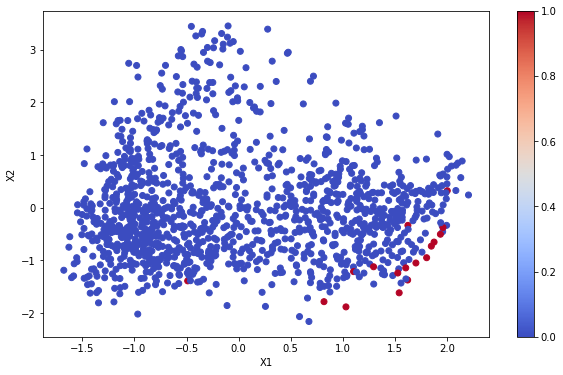

In [33]:
from sklearn.decomposition import PCA
X_normalized = preprocessing.normalize(X) # normalize X for processing
principal_components = PCA(n_components=2)
principal_components.fit(X_normalized)
X_reduced = principal_components.fit_transform(X_normalized)
X_reduced = preprocessing.scale(X_reduced)
fig, ax = plt.subplots(figsize=(10,6))
scatter_plot = ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.coolwarm )
fig.colorbar(scatter_plot, ax=ax)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# for ii, xx in enumerate(X_reduced):
#     if y[ii] == 0:
#         ax[0].scatter(xx[0], xx[1], c='r')
#     else:
#         ax[1].scatter(xx[0], xx[1], c='b')
# plt.setp(ax, xlim=(-1,1.6), ylim=(-4,4))